In [2]:
import numpy as np
from collections import Counter
from sklearn.datasets.samples_generator import make_classification
import matplotlib.pyplot as plt

In [11]:
# генерируем случайные данные
x, y = make_classification(n_samples=40, random_state=0, n_classes = 2, n_features=2, 
    n_redundant=0, n_informative=2, n_repeated=0)

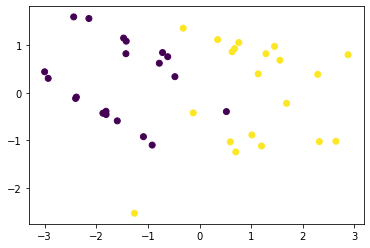

In [12]:
# посмотрим что получилось
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [13]:
def HGini(l): 
    """ Вычисляет критерий Джини для последовательности l"""
    length = len(l)
    cnt = Counter(l)
    
    gini = 0
    for cl in cnt.values():
        p_1 = cl / length
        p_2 = (1 - p_1)
        it = p_1 * p_2
        gini += it
    
    return gini

In [14]:
def IG(H, l, left_l, right_l):
    return H(l) - (len(left_l) / len(l)) * H(left_l) - (len(right_l) / len(l)) * H(right_l)

In [15]:
def features_max_IG(x, y):
    """Возвращает маскимальное значение gain-ов max_gains для каждого признака x
    и значение признака max_gains_row, на котором был достигнут максимальный gain
    """
    max_gains = []
    max_gains_row = []

    for i in range(x.shape[1]):
        sorted_column = sorted(x[:,i])
        max_gain = 0
        max_gain_row = 0

        for row in sorted_column:
            gain = IG(HGini, y, y[x[:,i] <= row], y[x[:,i] > row])
            if gain >= max_gain:
                max_gain = gain
                max_gain_row= row

        max_gains.append(max_gain)
        max_gains_row.append(max_gain_row)
        
    return max_gains, max_gains_row

In [16]:
def tree(x, y):
    """Строит дерево для x с ответами y"""
    gains, gains_rows = features_max_IG(x, y)
    max_idx = gains.index(max(gains))
    
    left_x = x[x[:, max_idx] <= gains_rows[max_idx]]
    right_x = x[x[:, max_idx] > gains_rows[max_idx]]
    
    left_y = y[x[:, max_idx] <= gains_rows[max_idx]]
    right_y = y[x[:, max_idx] > gains_rows[max_idx]]
    
    left_gini = HGini(left_y)
    right_gini = HGini(right_y)
    
    print(f'Разделяем по фиче №{max_idx}')
    print(f'IG =  {max(gains)}')
    print(f'Условие: фича №{max_idx} <= {gains_rows[max_idx]}')
    print(f'Элементов слева: {len(left_y)} Элементов справа: {len(right_y)}')
    print(f'Критерий Джини слева: {left_gini} Критерий Джини справа: {right_gini}')
    print('')
    
    if left_gini != 0:
        print(f'-- Левая группа. {len(left_y)} элементa(ов)')
        tree(left_x, left_y)
    
    if right_gini != 0:
        print(f'-- Правая группа. {len(right_y)} элемента(ов) ')
        tree(right_x, right_y)   

In [17]:
tree(x, y)

Разделяем по фиче №0
IG =  0.4049999999999999
Условие: фича №0 <= -0.4770177245253687
Элементов слева: 20 Элементов справа: 20
Критерий Джини слева: 0.09500000000000004 Критерий Джини справа: 0.09500000000000004

-- Левая группа. 20 элементa(ов)
Разделяем по фиче №1
IG =  0.09500000000000004
Условие: фича №1 <= -2.529335121330661
Элементов слева: 1 Элементов справа: 19
Критерий Джини слева: 0.0 Критерий Джини справа: 0.0

-- Правая группа. 20 элемента(ов) 
Разделяем по фиче №0
IG =  0.02000000000000003
Условие: фича №0 <= 0.5198607176320689
Элементов слева: 4 Элементов справа: 16
Критерий Джини слева: 0.375 Критерий Джини справа: 0.0

-- Левая группа. 4 элементa(ов)
Разделяем по фиче №0
IG =  0.375
Условие: фича №0 <= 0.35036352059454534
Элементов слева: 3 Элементов справа: 1
Критерий Джини слева: 0.0 Критерий Джини справа: 0.0

